In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import pandas as pd

from BSE import market_session

%reload_ext autoreload
%autoreload 2

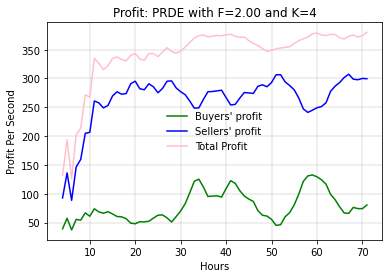

In [22]:
def plot_sma_profit (filename, k_value, f_value):
    df = pd.read_csv(filename, header=['None'])
    buyer_sum = pd.DataFrame()
    seller_sum = pd.DataFrame()

    
    for row in range(0,len(df.index)):
        b_sum = 0
        s_sum = 0
        for col in range (8, 219 ,7):
            b_sum +=df.loc[row][col]
        buyer_sum.loc[len(buyer_sum.index), 0] = b_sum

        for col in range (225, 428,7):
            s_sum +=df.loc[row][col]
        seller_sum.loc[len(seller_sum.index), 0] = s_sum
      
   
   # calculate smooth moving average
    buyers_sma = buyer_sum.loc[:,0].rolling(5).mean()
    sellers_sma = seller_sum.loc[:,0].rolling(5).mean()
    total_sma =  buyers_sma + sellers_sma
    
    
    t_period = list(range(len(buyers_sma.index)))
    plt.plot(t_period, buyers_sma, color='green', label='Buyers\' profit')    
    plt.plot(t_period, sellers_sma, color='blue', label='Sellers\' profit') 
    plt.plot(t_period, total_sma, color='pink', label='Total Profit') 
    plt.xlabel("Hours")
    plt.ylabel("Profit Per Second")
    plt.title(f"Profit: PRDE with F={f_value:.2f} and K={k_value}")
    plt.legend(frameon=False)
    plt.grid(linewidth=0.4)
#     plt.show()
    
    plt.savefig('sma_4_2_homg_static.png')

    
    
    
k=4
f=2.0
plot_sma_profit(f'Homog_Static/trial{k:02d}_{f:.2f}_strats.csv', k, f)

In [158]:
def calc_total_profit(filename, start):
    df = pd.read_csv(filename, header=None)

    b_sum = 0
    s_sum = 0
    for row in range(start,72):
       
        for col in range (8, 219 ,7):
            b_sum +=df.loc[row][col]
        for col in range (225, 428,7):
            s_sum +=df.loc[row][col]
   
                           
    return b_sum, s_sum
    
      
   
# df = pd.DataFrame(columns = ['k', 'f', 'buyer_total', 'seller_total', 'trader_total', 'bt_15', 'st_15', 'total_15'])
buyer = []
seller = []
total = []


for f in np.linspace(0,2,21):

    rowb = []
    rows = []
    rowt = []
    
    
    for k in range(4, 11):
    

#             buyer, seller = calc_total_profit(f'Homog_Static/trial{k:02d}_{f:.2f}_strats.csv', 0)
            buyer_15, seller_15 = calc_total_profit(f'Homog_Static/trial{k:02d}_{f:.2f}_strats.csv', 15)
            rowb.append(buyer_15)
            rows.append(seller_15)
            rowt.append(buyer_15+seller_15)
        
            
#             df.loc[len(df.index)] = [k, f, buyer, seller, buyer+seller, buyer_15, seller_15, buyer_15+seller_15]
    total.append(rowt)
    buyer.append(rowb)
    seller.append(rows)
    
    
# display(df)
# df.to_csv('results.csv')

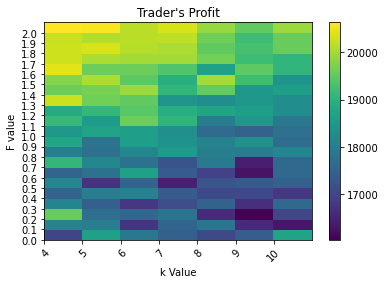

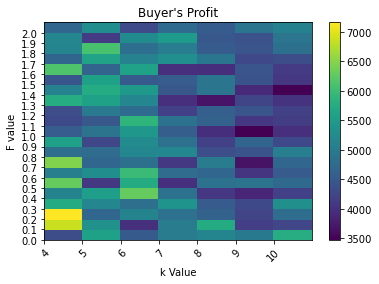

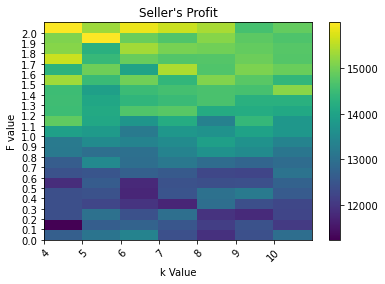

In [162]:
def heatmap(data, file_name, title):

    ks = [i for i in range(4,11)]
    Fs = [round(i,2) for i in np.linspace(0,2,21)]

    fig, ax = plt.subplots()

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(ks)))
    ax.set_yticks(np.arange(len(Fs)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(ks)
    ax.set_yticklabels(Fs)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    plt.xlabel("k Value")
    plt.ylabel("F value")
    plt.title(title)
    heatmap = plt.pcolor(data)
    plt.colorbar(heatmap)
#     ax.imshow(data, cmap='hot')
    
    plt.savefig(file_name)
    
heatmap(total, 'figures/total.jpg', 'Trader\'s Profit')
heatmap(buyer, 'figures/buyer.jpg', 'Buyer\'s Profit')
heatmap(seller, 'figures/seller.jpg', 'Seller\'s Profit')

